Image without augmentation: 


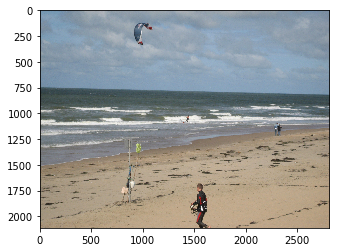

random_horizontal_flip


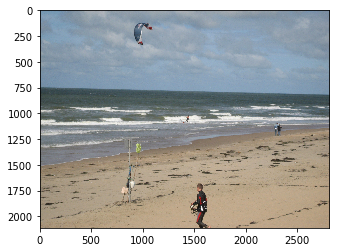

random_vertical_flip


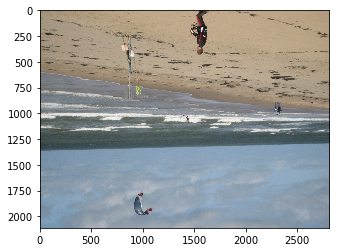

random_rotation90


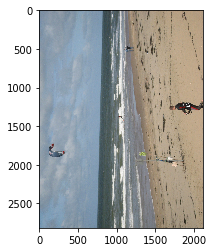

random_pixel_value_scale


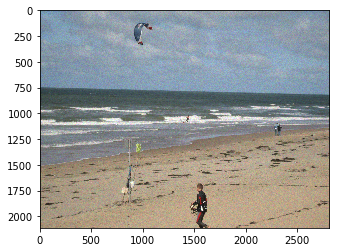

random_image_scale


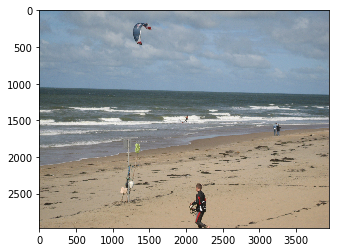

random_rgb_to_gray


KeyboardInterrupt: 

In [1]:
from object_detection.core import preprocessor
import functools, os
from object_detection import inputs
from object_detection.core import standard_fields as fields
from matplotlib import pyplot as mp
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

# This is needed to display the images.
%matplotlib inline

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.float32)#.astype(np.uint8)

number_of_repeats = 1 # lot of augmentations have probabilities < 1 will not happen if repeated only once.



# DOWNLOAD IMAGE FROM THE WEB
import requests
from io import BytesIO
response = requests.get("https://upload.wikimedia.org/wikipedia/en/9/99/Kitesurfing_in_Noordwijk2.JPG")
image2 = Image.open(BytesIO(response.content))

# UNCOMMENT THIS CODE TO USE YOUR PICTURE
#IMAGE = "" # add image here
#image2 = Image.open(IMAGE)



image_np = load_image_into_numpy_array(image2) 

save_to_disk = False
directory = 'visualize_augmentation'
preprocessing_list = [None, 
                      (preprocessor.random_horizontal_flip, {}), 
                      (preprocessor.random_vertical_flip, {}), 
                      (preprocessor.random_rotation90, {}), 
                      (preprocessor.random_pixel_value_scale, {}), # slightly changes the values of pixels
                      (preprocessor.random_image_scale, {}),  
                      (preprocessor.random_rgb_to_gray, {}),
                      (preprocessor.random_adjust_brightness, {}),
                      (preprocessor.random_adjust_contrast, {}),
                      (preprocessor.random_adjust_hue, {}),
                      (preprocessor.random_adjust_saturation, {}),
                      (preprocessor.random_distort_color, {}), # very strong augmentation
                      #(preprocessor.random_jitter_boxes, {}),
                      (preprocessor.random_crop_image, {}), 
                      (preprocessor.random_pad_image, {}), # changes the pixel values
                      #(preprocessor.random_absolute_pad_image, {}),
                      (preprocessor.random_crop_pad_image, {}), 
                      #(preprocessor.random_crop_to_aspect_ratio, {}),
                      (preprocessor.random_pad_to_aspect_ratio, {}),
                      (preprocessor.random_black_patches, {}),
                      #(preprocessor.random_resize_method, {}),
                      (preprocessor.resize_to_min_dimension, {}), 
                      (preprocessor.scale_boxes_to_pixel_coordinates, {}), 
                      #(preprocessor.subtract_channel_mean, {}),
                      #(preprocessor.random_self_concat_image, {}),
                      (preprocessor.ssd_random_crop, {}),
                      (preprocessor.ssd_random_crop_pad, {}),
                      #(preprocessor.ssd_random_crop_fixed_aspect_ratio, {}),
                      (preprocessor.ssd_random_crop_pad_fixed_aspect_ratio, {}),
                      #(preprocessor.convert_class_logits_to_softmax, {}),

                      # 
                     ]
for preprocessing_technique in preprocessing_list:
    for i in range(number_of_repeats):
        tf.reset_default_graph()
        if preprocessing_technique is  not None:
            print(str(preprocessing_technique[0].__name__))
        else:
            print('Image without augmentation: ')    
        if preprocessing_technique is not None:
            data_augmentation_options = [preprocessing_technique]
        else:
            data_augmentation_options = []
        data_augmentation_fn = functools.partial(
                inputs.augment_input_data,
                data_augmentation_options=data_augmentation_options)
        tensor_dict = {
                fields.InputDataFields.image:
                    tf.constant(image_np.astype(np.float32)),
                fields.InputDataFields.groundtruth_boxes:
                    tf.constant(np.array([[.5, .5, 1., 1.]], np.float32)),
                fields.InputDataFields.groundtruth_classes:
                    tf.constant(np.array([1.0], np.float32)),
            }
        augmented_tensor_dict = data_augmentation_fn(tensor_dict=tensor_dict)
        with tf.Session() as sess:
              augmented_tensor_dict_out = sess.run(augmented_tensor_dict)
        plt.figure()
        plt.imshow(augmented_tensor_dict_out[fields.InputDataFields.image].astype(int))
        plt.show()
        
        if save_to_disk:
            plt.imshow(augmented_tensor_dict_out[fields.InputDataFields.image].astype(int))
            if not os.path.exists(directory):
                os.makedirs(directory)
            if preprocessing_technique is  not None:
                mp.savefig(directory +'/augmentation_'+str(preprocessing_technique[0].__name__)+'_'+str(i)+'.png', dpi=300,  bbox_inches='tight')
            else:
                mp.savefig(directory + '/no_augmentation.png', dpi=300,  bbox_inches='tight')
        plt.close('all')